# 1. Introduction


In [29]:
library(tidyverse)

who <- data.frame(who)
population <- read.csv("/kaggle/input/population/Population.csv")

glimpse(who)
glimpse(population)

Rows: 7,240
Columns: 60
$ country      <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan…
$ iso2         <chr> "AF", "AF", "AF", "AF", "AF", "AF", "AF", "AF", "AF", "AF…
$ iso3         <chr> "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", "…
$ year         <dbl> 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 198…
$ new_sp_m014  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m1524 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m2534 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m3544 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m4554 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m5564 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m65   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_f014  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_f1524 <

# 2. Import

In [4]:
# Identify columns with missing values
columns_with_na <- population %>%
  summarise(across(everything(), ~sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "column", values_to = "na_count") %>%
  filter(na_count > 0) %>%
  pull(column)
print(paste("Columns with missing values:", paste(columns_with_na, collapse = ", ")))

population_cleaned <- population %>%
  mutate(across(all_of(columns_with_na), ~ifelse(is.na(.), median(., na.rm = TRUE), .)))

# NA values before cleaning
na_before <- population %>%
  summarise(across(everything(), ~sum(is.na(.))))
# NA values after cleaning
na_after <- population_cleaned %>%
  summarise(across(everything(), ~sum(is.na(.))))
print("NA values before cleaning:")
print(na_before)
print("NA values after cleaning:")
print(na_after)

population2<-population_cleaned
summary(population2)

[1] "Columns with missing values: X1960, X1961, X1962, X1963, X1964, X1965, X1966, X1967, X1968, X1969, X1970, X1971, X1972, X1973, X1974, X1975, X1976, X1977, X1978, X1979, X1980, X1981, X1982, X1983, X1984, X1985, X1986, X1987, X1988, X1989, X1990, X1991, X1992, X1993, X1994, X1995, X1996, X1997, X1998, X1999, X2000, X2001, X2002, X2003, X2004, X2005, X2006, X2007, X2008, X2009, X2010, X2011, X2012, X2013, X2014, X2015, X2016, X2017, X2018, X2019, X2020, X2021, X2022, X2023"
[1] "NA values before cleaning:"
  Country.Name Country.Code Indicator.Name Indicator.Code X1960 X1961 X1962
1            0            0              0              0     2     2     2
  X1963 X1964 X1965 X1966 X1967 X1968 X1969 X1970 X1971 X1972 X1973 X1974 X1975
1     2     2     2     2     2     2     2     2     2     2     2     2     2
  X1976 X1977 X1978 X1979 X1980 X1981 X1982 X1983 X1984 X1985 X1986 X1987 X1988
1     2     2     2     2     2     2     2     2     2     2     2     2     2
  X1989 X1990

 Country.Name       Country.Code       Indicator.Name     Indicator.Code    
 Length:266         Length:266         Length:266         Length:266        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     X1960               X1961               X1962          
 Min.   :2.715e+03   Min.   :2.970e+03   Min.   :3.264e+03  
 1st Qu.:5.197e+05   1st Qu.:5.309e+05   1st Qu.:5.426e+05  
 Median :3.660e+06   Median :3.747e+06   Median :3.832e+06  
 Mean   :1.146e+08   Mean   :1.162e+08   Mean   :1.183e+08  
 3rd Qu.:2.639e+07   3rd Qu.:2.714e+07   3rd Qu.:2.788e+07  
 Max.   :3.022e+09   Max.   :3.063e+09   Max.   :3.117e+09  
     X1963               X1964    

# 3. Tidy Data

## 3.1 who dataset


In [69]:
library(tidyr)
library(dplyr)
#colnames(who)
who3 <- who %>%
  pivot_longer(
    cols = starts_with("new"),
    names_to = c("new", "tb_type", "sex", "age"),
    names_pattern = "(new)?_?(.*)_([mf])(\\d+)"
  ) %>%
  select(-new)

who_tidy <- who3
head(who_tidy)
unique(who_tidy$country)

country,iso2,iso3,year,tb_type,sex,age,value
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Afghanistan,AF,AFG,1980,sp,m,014,NA
Afghanistan,AF,AFG,1980,sp,m,1524,NA
Afghanistan,AF,AFG,1980,sp,m,2534,NA
Afghanistan,AF,AFG,1980,sp,m,3544,NA
Afghanistan,AF,AFG,1980,sp,m,4554,NA
Afghanistan,AF,AFG,1980,sp,m,5564,NA


[1] "Afghanistan"                                         
  [2] "Albania"                                             
  [3] "Algeria"                                             
  [4] "American Samoa"                                      
  [5] "Andorra"                                             
  [6] "Angola"                                              
  [7] "Anguilla"                                            
  [8] "Antigua and Barbuda"                                 
  [9] "Argentina"                                           
 [10] "Armenia"                                             
 [11] "Aruba"                                               
 [12] "Australia"                                           
 [13] "Austria"                                             
 [14] "Azerbaijan"                                          
 [15] "Bahamas"                                             
 [16] "Bahrain"                                             
 [17] "Bangladesh"                                          
 [18] "Barbados"                                            
 [19] "Belarus"                                             
 [20] "Belgium"                                             
 [21] "Belize"                                              
 [22] "Benin"                                               
 [23] "Bermuda"                                             
 [24] "Bhutan"                                              
 [25] "Bolivia (Plurinational State of)"                    
 [26] "Bonaire, Saint Eustatius and Saba"                   
 [27] "Bosnia and Herzegovina"                              
 [28] "Botswana"                                            
 [29] "Brazil"                                              
 [30] "British Virgin Islands"                              
 [31] "Brunei Darussalam"                                   
 [32] "Bulgaria"                                            
 [33] "Burkina Faso"                                        
 [34] "Burundi"                                             
 [35] "Cabo Verde"                                          
 [36] "Cambodia"                                            
 [37] "Cameroon"                                            
 [38] "Canada"                                              
 [39] "Cayman Islands"                                      
 [40] "Central African Republic"                            
 [41] "Chad"                                                
 [42] "Chile"                                               
 [43] "China"                                               
 [44] "China, Hong Kong SAR"                                
 [45] "China, Macao SAR"                                    
 [46] "Colombia"                                            
 [47] "Comoros"                                             
 [48] "Congo"                                               
 [49] "Cook Islands"                                        
 [50] "Costa Rica"                                          
 [51] "Cote d'Ivoire"                                       
 [52] "Croatia"                                             
 [53] "Cuba"                                                
 [54] "Curacao"                                             
 [55] "Cyprus"                                              
 [56] "Czech Republic"                                      
 [57] "Democratic People's Republic of Korea"               
 [58] "Democratic Republic of the Congo"                    
 [59] "Denmark"                                             
 [60] "Djibouti"                                            
 [61] "Dominica"                                            
 [62] "Dominican Republic"                                  
 [63] "Ecuador"                                             
 [64] "Egypt"                                               
 [65] "El Salvador"                                         
 [66] "Equatorial Guinea"            

## 3.2 population dataset


In [70]:
population3 <- population2 %>%
  pivot_longer(
    cols = starts_with("X"),
    names_to = "year",
    values_to = "population"
  )

population_tidy <- population3 %>%
  mutate(
    year = as.integer(sub("^X", "", year)),
    population = as.numeric(population)
  )
population_tidy <- rename(population_tidy, country = Country.Name)
colnames(population_tidy)
unique(population_tidy$country)

[1] "country"        "Country.Code"   "Indicator.Name" "Indicator.Code"
[5] "year"           "population"

[1] "Aruba"                                               
  [2] "Africa Eastern and Southern"                         
  [3] "Afghanistan"                                         
  [4] "Africa Western and Central"                          
  [5] "Angola"                                              
  [6] "Albania"                                             
  [7] "Andorra"                                             
  [8] "Arab World"                                          
  [9] "United Arab Emirates"                                
 [10] "Argentina"                                           
 [11] "Armenia"                                             
 [12] "American Samoa"                                      
 [13] "Antigua and Barbuda"                                 
 [14] "Australia"                                           
 [15] "Austria"                                             
 [16] "Azerbaijan"                                          
 [17] "Burundi"                                             
 [18] "Belgium"                                             
 [19] "Benin"                                               
 [20] "Burkina Faso"                                        
 [21] "Bangladesh"                                          
 [22] "Bulgaria"                                            
 [23] "Bahrain"                                             
 [24] "Bahamas, The"                                        
 [25] "Bosnia and Herzegovina"                              
 [26] "Belarus"                                             
 [27] "Belize"                                              
 [28] "Bermuda"                                             
 [29] "Bolivia"                                             
 [30] "Brazil"                                              
 [31] "Barbados"                                            
 [32] "Brunei Darussalam"                                   
 [33] "Bhutan"                                              
 [34] "Botswana"                                            
 [35] "Central African Republic"                            
 [36] "Canada"                                              
 [37] "Central Europe and the Baltics"                      
 [38] "Switzerland"                                         
 [39] "Channel Islands"                                     
 [40] "Chile"                                               
 [41] "China"                                               
 [42] "Cote d'Ivoire"                                       
 [43] "Cameroon"                                            
 [44] "Congo, Dem. Rep."                                    
 [45] "Congo, Rep."                                         
 [46] "Colombia"                                            
 [47] "Comoros"                                             
 [48] "Cabo Verde"                                          
 [49] "Costa Rica"                                          
 [50] "Caribbean small states"                              
 [51] "Cuba"                                                
 [52] "Curacao"                                             
 [53] "Cayman Islands"                                      
 [54] "Cyprus"                                              
 [55] "Czechia"                                             
 [56] "Germany"                                             
 [57] "Djibouti"                                            
 [58] "Dominica"                                            
 [59] "Denmark"                                             
 [60] "Dominican Republic"                                  
 [61] "Algeria"                                             
 [62] "East Asia & Pacific (excluding high income)"         
 [63] "Early-demographic dividend"                          
 [64] "East Asia & Pacific"                                 
 [65] "Europe & Central Asia (excluding high income)"       
 [66] "Europe & Central Asia"        

## 3.3 Join Datasets
## 3.4 Clean up Data

In [74]:

library(dplyr)


population_tidy <- population_tidy %>%
  mutate(country = ifelse(country == "United States", 
                          "United States of America", 
                          country))

tuberculosis <- who_tidy %>%
  left_join(population_tidy, by = c("country", "year"))
unique(tuberculosis$country)
head(tuberculosis)

[1] "Afghanistan"                                         
  [2] "Albania"                                             
  [3] "Algeria"                                             
  [4] "American Samoa"                                      
  [5] "Andorra"                                             
  [6] "Angola"                                              
  [7] "Anguilla"                                            
  [8] "Antigua and Barbuda"                                 
  [9] "Argentina"                                           
 [10] "Armenia"                                             
 [11] "Aruba"                                               
 [12] "Australia"                                           
 [13] "Austria"                                             
 [14] "Azerbaijan"                                          
 [15] "Bahamas"                                             
 [16] "Bahrain"                                             
 [17] "Bangladesh"                                          
 [18] "Barbados"                                            
 [19] "Belarus"                                             
 [20] "Belgium"                                             
 [21] "Belize"                                              
 [22] "Benin"                                               
 [23] "Bermuda"                                             
 [24] "Bhutan"                                              
 [25] "Bolivia (Plurinational State of)"                    
 [26] "Bonaire, Saint Eustatius and Saba"                   
 [27] "Bosnia and Herzegovina"                              
 [28] "Botswana"                                            
 [29] "Brazil"                                              
 [30] "British Virgin Islands"                              
 [31] "Brunei Darussalam"                                   
 [32] "Bulgaria"                                            
 [33] "Burkina Faso"                                        
 [34] "Burundi"                                             
 [35] "Cabo Verde"                                          
 [36] "Cambodia"                                            
 [37] "Cameroon"                                            
 [38] "Canada"                                              
 [39] "Cayman Islands"                                      
 [40] "Central African Republic"                            
 [41] "Chad"                                                
 [42] "Chile"                                               
 [43] "China"                                               
 [44] "China, Hong Kong SAR"                                
 [45] "China, Macao SAR"                                    
 [46] "Colombia"                                            
 [47] "Comoros"                                             
 [48] "Congo"                                               
 [49] "Cook Islands"                                        
 [50] "Costa Rica"                                          
 [51] "Cote d'Ivoire"                                       
 [52] "Croatia"                                             
 [53] "Cuba"                                                
 [54] "Curacao"                                             
 [55] "Cyprus"                                              
 [56] "Czech Republic"                                      
 [57] "Democratic People's Republic of Korea"               
 [58] "Democratic Republic of the Congo"                    
 [59] "Denmark"                                             
 [60] "Djibouti"                                            
 [61] "Dominica"                                            
 [62] "Dominican Republic"                                  
 [63] "Ecuador"                                             
 [64] "Egypt"                                               
 [65] "El Salvador"                                         
 [66] "Equatorial Guinea"            

country,iso2,iso3,year,tb_type,sex,age,value,Country.Code,Indicator.Name,Indicator.Code,population
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Afghanistan,AF,AFG,1980,sp,m,014,NA,AFG,"Population, total",SP.POP.TOTL,13169311
Afghanistan,AF,AFG,1980,sp,m,1524,NA,AFG,"Population, total",SP.POP.TOTL,13169311
Afghanistan,AF,AFG,1980,sp,m,2534,NA,AFG,"Population, total",SP.POP.TOTL,13169311
Afghanistan,AF,AFG,1980,sp,m,3544,NA,AFG,"Population, total",SP.POP.TOTL,13169311
Afghanistan,AF,AFG,1980,sp,m,4554,NA,AFG,"Population, total",SP.POP.TOTL,13169311
Afghanistan,AF,AFG,1980,sp,m,5564,NA,AFG,"Population, total",SP.POP.TOTL,13169311


# 4. Data Manipulation

In [78]:
library(dplyr)

total_tb_sex <- tuberculosis %>%
  filter(country == "United States of America", year >= 2000) %>%
  group_by(sex) %>%
  summarise(total_cases = sum(value, na.rm = TRUE)) %>%
  arrange(desc(total_cases))
total_tb_sex

tuberculosis <- tuberculosis %>%
  mutate(cases_per_100k = (value / population) * 100000)
highest_case <- tuberculosis %>%
  arrange(desc(cases_per_100k)) %>%
  slice(1) %>%
  select(country, year, cases_per_100k)

lowest_case <- tuberculosis %>%
  arrange(cases_per_100k) %>%
  slice(1) %>%
  select(country, year, cases_per_100k)

highest_case
lowest_case


sex,total_cases
<chr>,<dbl>
m,77867
f,45768


country,year,cases_per_100k
<chr>,<dbl>,<dbl>
Samoa,2009,580.1173


country,year,cases_per_100k
<chr>,<dbl>,<dbl>
Afghanistan,1997,0


# 5. Data Visualization


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


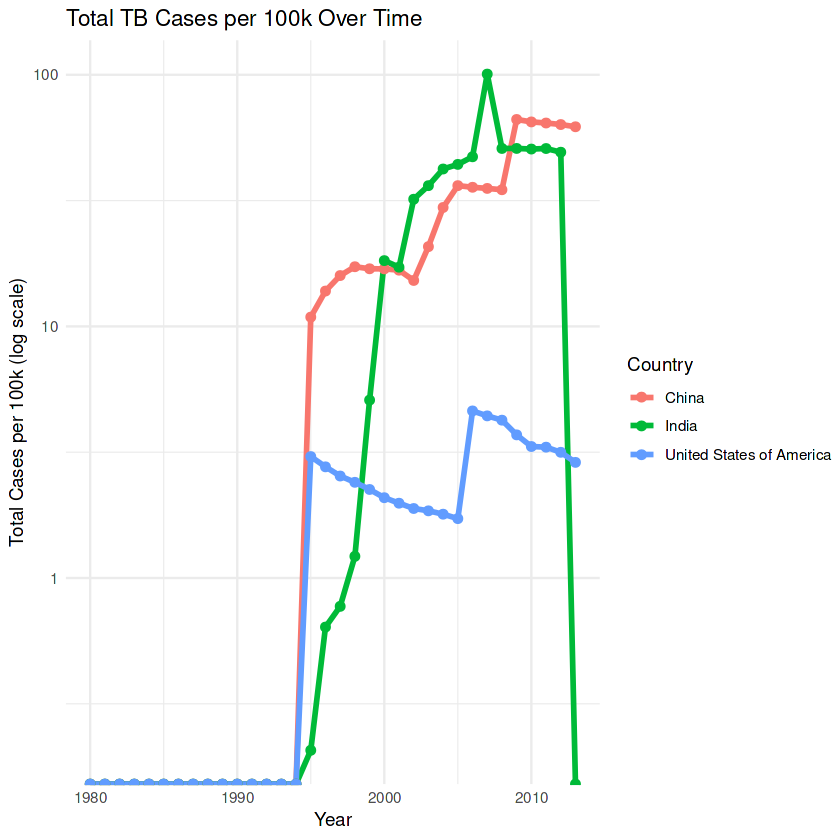

In [79]:
library(ggplot2)
library(dplyr)

# Summarize total cases per 100k per country and year
cases_by_year <- tuberculosis %>%
  filter(country %in% c("China", "India", "United States of America")) %>%
  group_by(country, year) %>%
  summarise(total_cases_per_100k = sum(cases_per_100k, na.rm = TRUE), .groups = "drop")

# Plot
ggplot(cases_by_year, aes(x = year, y = total_cases_per_100k, color = country)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  scale_y_log10() +
  labs(
    title = "Total TB Cases per 100k Over Time",
    x = "Year",
    y = "Total Cases per 100k (log scale)",
    color = "Country"
  ) +
  theme_minimal()

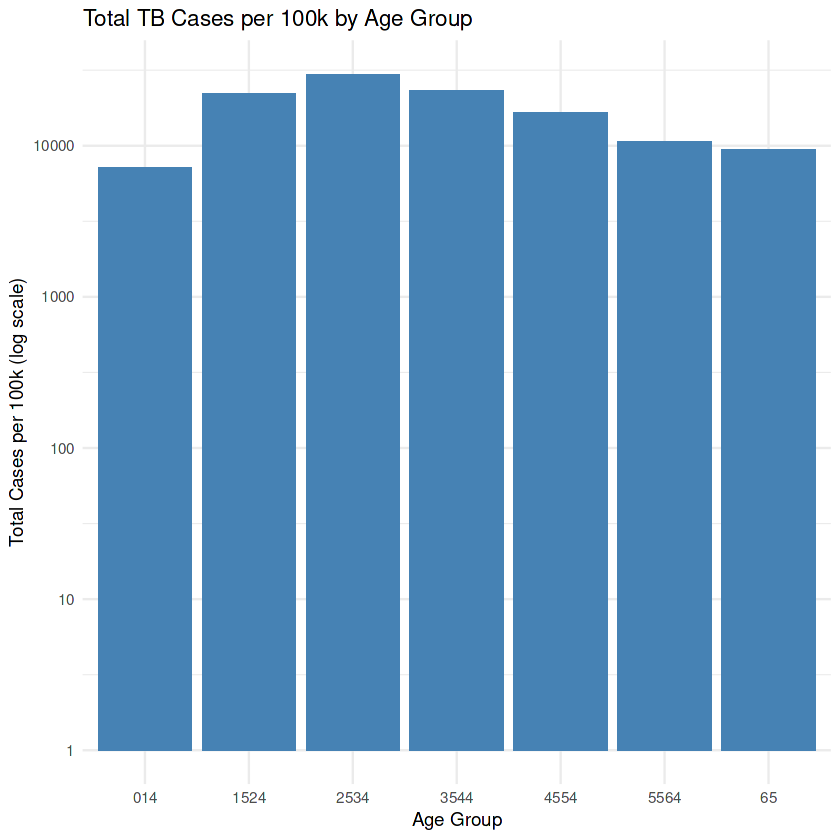

In [80]:
# Summarize by age group
cases_by_age <- tuberculosis %>%
  group_by(age) %>%
  summarise(total_cases_per_100k = sum(cases_per_100k, na.rm = TRUE), .groups = "drop")

# Plot
ggplot(cases_by_age, aes(x = age, y = total_cases_per_100k)) +
  geom_col(fill = "steelblue") +
  scale_y_log10() +
  labs(
    title = "Total TB Cases per 100k by Age Group",
    x = "Age Group",
    y = "Total Cases per 100k (log scale)"
  ) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


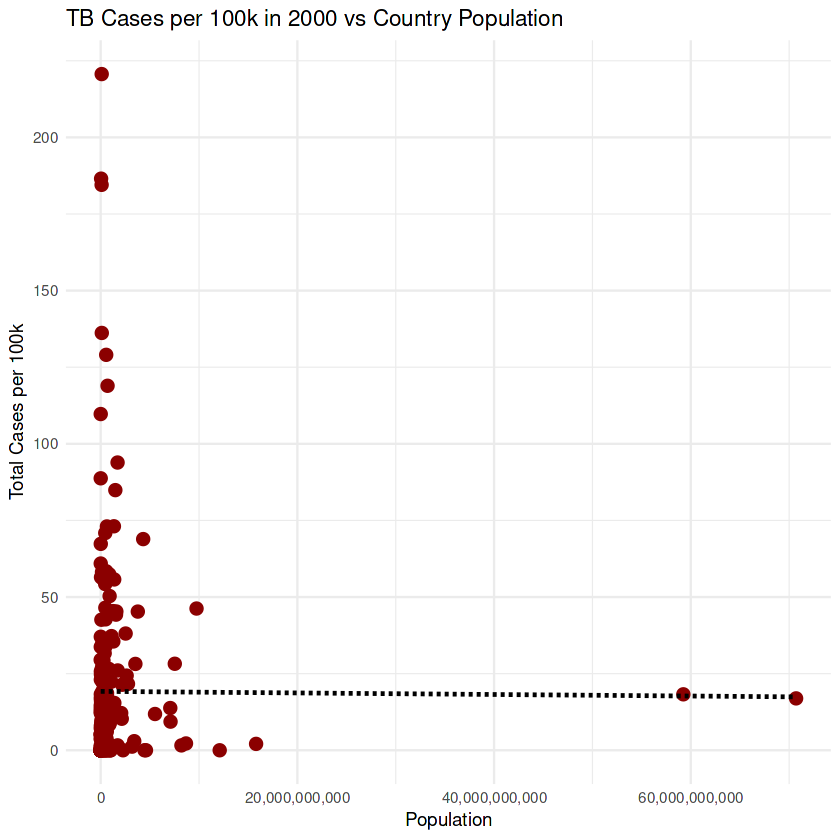

In [81]:
# Filter for year 2000
cases_2000 <- tuberculosis %>%
  filter(year == 2000) %>%
  group_by(country) %>%
  summarise(
    total_cases_per_100k = sum(cases_per_100k, na.rm = TRUE),
    population = sum(population, na.rm = TRUE),
    .groups = "drop"
  )

ggplot(cases_2000, aes(x = population, y = total_cases_per_100k)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed") +
  scale_x_continuous(labels = scales::comma) +
  labs(
    title = "TB Cases per 100k in 2000 vs Country Population",
    x = "Population",
    y = "Total Cases per 100k"
  ) +
  theme_minimal()


### 1. Relativity: India has the highest TB cases per 100k while China is in the middle but the US has the lowest TB rate showing low incidence of the disease.
### 2. Trends over time: The three countries have a downward slope toward the end indicating gradual improvement in their control against the disease over the years.
### 3. Overall: The three countries have the highest populations in the world and the issue with TB is still seen especially in India and China compared to the US, though of  course healthcare and medicinal technology have come a long way and is seen through the downward slope that indicates the lower rate of TB as time goes by. The last graph shows that almost all high-incidence countries have very small populations as seen in the cluster near the left side of the x-axis but still there are several countries that exceed 150-200 cases per 100k, but only among those with populations that are well under 10-20 million. It indicates that as population increases the incidence rate drops and stabilizes.